# Assignment 8
Data 602 <p>Fall 2022
<p>Noah Collin

data here:
https://data.cityofnewyork.us/City-Government/DSNY-Monthly-Tonnage-Data/ebb7-mvp5

## DSNY Monthly Tonnage Data
(Department of Sanitation of NY)

<i>"You should also provide some explanation on why you choose this dataset..."</i><p>
    I chose this dataset because I'm a New Yorker and I have a buddy who has applied to the DSNY and if I might send him a screenshot of some of the work I do here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
filePath = 'DSNY_Monthly_Tonnage_Data.csv'

In [3]:
df = pd.read_csv(filePath)

#### Explanation of Data and columns from documentation

In [4]:
explanationPath = 'DSNY-Monthly-Tonnage-Data-OpenDataDictionary-2022-02-22.xlsx'
try:
    explanationDF = pd.read_excel(explanationPath, skiprows=1, sheet_name= "Column Info")
except:
    print("You probably need to install openpyxl ...")
#This explanation excel file only has ten rows:

In [5]:
explanationDF.head(3)

,Column Name,Column Description,"Term, Acronym, or Code Definitions","Additional Notes \n(where applicable, include the range of possible values, units of measure, how to interpret null/zero values, whether there are specific relationships between columns, and information on column source)"
0,MONTH,Year and Month,NaN,NaN
1,BOROUGH,One of the 5 boroughs within NYC,NaN,NaN
2,COMMUNITYDISTRICT,One of NYC's 59 community districts which corr...,New York City is divided into 59 geographic Co...,"For a list of community boards, see: https://w..."


In [6]:
for i in range(len(explanationDF)):
    print(explanationDF.iloc[i][0] )
    print(explanationDF.iloc[i][1] )
    print()

MONTH
Year and Month

BOROUGH
One of the 5 boroughs within NYC

COMMUNITYDISTRICT
One of NYC's 59 community districts which correspond to Sanitation districts. 

REFUSETONSCOLLECTED
Tons of trash or refuse collected from NYC residences and institutions serviced by the NYC Department of Sanitation.

PAPERTONSCOLLECTED
Tons of source-separated recyclable paper collected from NYC residences and institutions serviced by the NYC Department of Sanitation.

MGPTONSCOLLECTED
Tons of source-separated recyclable metal, glass, plastic, and beverage cartons collected from NYC residences and institutions serviced by the NYC Department of Sanitation.

RESORGANICSTONS
Tons of source-separated residential organics collected from NYC residences serviced by the NYC Department of Sanitation. Only certain areas within NYC receive this service.

SCHOOLORGANICTONS
Tons of source-separated organics collected from NYC schools serviced by the NYC Department of Sanitation. Only schools within certain areas in N

### Basic EDA

In [7]:
df.head(3)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,1990 / 08,Manhattan,03,3258.3,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1990 / 10,Manhattan,03,3829.9,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1990 / 10,Staten Island,02,4379.5,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [8]:
df.shape

(22528, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22528 entries, 0 to 22527
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MONTH                22528 non-null  object 
 1   BOROUGH              22528 non-null  object 
 2   COMMUNITYDISTRICT    22528 non-null  object 
 3   REFUSETONSCOLLECTED  22523 non-null  float64
 4   PAPERTONSCOLLECTED   19901 non-null  float64
 5   MGPTONSCOLLECTED     19613 non-null  float64
 6   RESORGANICSTONS      1706 non-null   float64
 7   SCHOOLORGANICTONS    1240 non-null   float64
 8   LEAVESORGANICTONS    812 non-null    float64
 9   XMASTREETONS         1599 non-null   float64
 10  BOROUGH_ID           22523 non-null  float64
dtypes: float64(8), object(3)
memory usage: 1.9+ MB


In [10]:
df.describe()

,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
count,22523.000000,19901.000000,19613.000000,1706.000000,1240.000000,812.000000,1599.000000,22523.000000
mean,3758.880837,417.743661,348.024800,74.836753,39.908306,175.601970,26.716698,2.727079
std,1471.327034,268.732537,178.091523,72.024562,26.268878,276.409713,25.445894,1.181424
min,8.400000,0.000000,0.000000,0.400000,0.500000,0.600000,0.400000,1.000000
25%,2626.950000,222.500000,219.300000,21.325000,23.100000,13.675000,9.800000,2.000000
50%,3583.400000,384.000000,326.200000,54.650000,33.700000,65.850000,18.500000,3.000000
75%,4773.150000,555.100000,449.200000,104.275000,48.725000,204.450000,35.400000,4.000000
max,9757.000000,2129.700000,1250.500000,562.700000,229.600000,1857.300000,186.000000,5.000000


### Light cleaning / reshaping / dropping / wrangling

In [11]:
df['Year'] = df['MONTH'].apply(lambda x: re.findall("[19|20]{2}[0129][0-9]",x)[0].strip()).astype(int)

In [12]:
df['Month'] = df['MONTH'].apply(lambda x: re.findall(" [01][0-9]",x)[0].strip()).astype(int)

This might be wrong, but I'm going to fill NaN values with zeros so summing works better...  This might be worth discussing with an expert if this were a real-world project.

In [13]:
df = df.fillna(0)

In [14]:
df['Total_Organics'] = df['LEAVESORGANICTONS'] + df["SCHOOLORGANICTONS"] + df['RESORGANICSTONS']

In [15]:
df['Total_Collection'] = df['REFUSETONSCOLLECTED']+df['PAPERTONSCOLLECTED']+df['MGPTONSCOLLECTED']+df['RESORGANICSTONS']+df['SCHOOLORGANICTONS']+df['LEAVESORGANICTONS']+df['XMASTREETONS']

In [16]:
df[df['Total_Organics'].notnull()].head(4)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID,Year,Month,Total_Organics,Total_Collection
0,1990 / 08,Manhattan,03,3258.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1990,8,0.0,3258.3
1,1990 / 10,Manhattan,03,3829.9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1990,10,0.0,3829.9
2,1990 / 10,Staten Island,02,4379.5,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1990,10,0.0,4379.5
3,1990 / 10,Manhattan,07,3463.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1990,10,0.0,3463.6


The <i>'BOROUGH_ID'</i> doesn't really accomplish anything, so drop it...

In [17]:
if ('BOROUGH_ID' in df.columns.tolist()):
    df.drop('BOROUGH_ID', inplace=True, axis = 1)
else:
    print("Already dropped...")

In [18]:
BoroughGroupBy = df.groupby("BOROUGH")

In [19]:
print(BoroughGroupBy.Total_Collection.mean().round(1).sort_values(ascending = False) )

BOROUGH
Staten Island    6248.3
Queens           5269.5
Brooklyn         4573.2
Manhattan        3877.1
Bronx            3407.3
Name: Total_Collection, dtype: float64


In [20]:
print(BoroughGroupBy.Total_Collection.median().round(1).sort_values(ascending = False) )

BOROUGH
Staten Island    6212.6
Queens           5018.5
Brooklyn         4482.7
Bronx            3468.1
Manhattan        3328.0
Name: Total_Collection, dtype: float64


I really find it very suprsing that Staten Island gets the most collection.... Thier population is 493,494.  It's by far the least populated of the five buroughs.  Maybe they have more industry there.  I really can't explain why that would be.  Also suprising is Manhattan is the penultimate on the list.  I feel like I'm always walking around garbage bags there.

In [21]:
MonthlyBoroughGroupby = df.groupby(["BOROUGH","Month"])
print(MonthlyBoroughGroupby.Total_Collection.median().round(1) )

BOROUGH        Month
Bronx          1        3301.9
               2        2861.7
               3        3316.2
               4        3431.4
               5        3676.6
               6        3734.2
               7        3655.4
               8        3554.1
               9        3517.6
               10       3447.6
               11       3569.1
               12       3464.5
Brooklyn       1        4285.2
               2        3811.4
               3        4416.0
               4        4414.4
               5        4669.9
               6        4759.5
               7        4687.0
               8        4648.4
               9        4600.0
               10       4517.2
               11       4554.9
               12       4562.8
Manhattan      1        3312.7
               2        2962.6
               3        3268.3
               4        3209.6
               5        3392.2
               6        3469.8
               7        3386.7
               8  

# PLOTS

#### The following plots are useless:

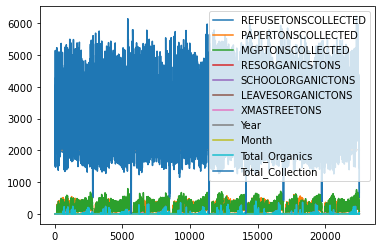

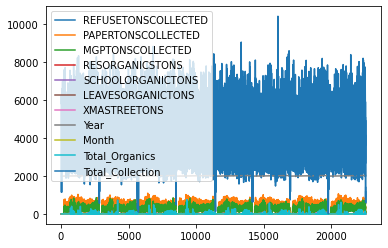

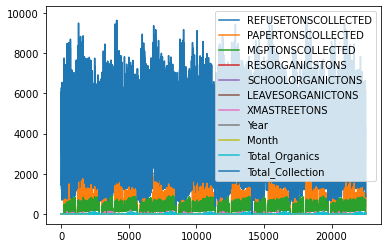

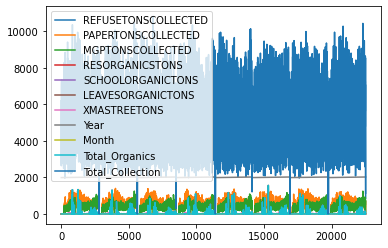

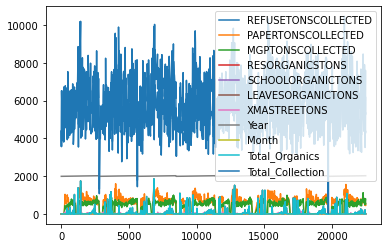

In [22]:
BoroughGroupBy.plot()
plt.title = BoroughGroupBy["BOROUGH"]
plt.show()

### Plotting with pyplot

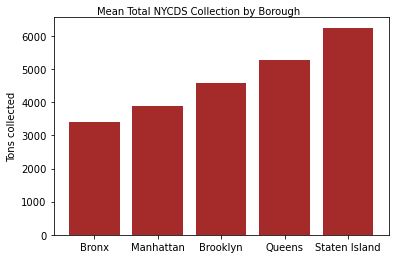

In [23]:
x = np.array(BoroughGroupBy.Total_Collection.mean().sort_values(ascending = True).index)
y = np.array(BoroughGroupBy.Total_Collection.mean().sort_values(ascending = True).values)

#plt.title("Total Collection by Borough")  <-- This would not work

plt.bar(x,y, color = "brown")
plt.text(.05,6650,s = "Mean Total NYCDS Collection by Borough")# title was not working on groupby objects, had to make the "title" this janky way
#Add annotations ✓
plt.ylabel("Tons collected") #Change the title and x/y labels ✓ 
plt.show()

#This plot will show the total Refuse collection, an aggregated column created above in the wrangling section, by Borough...

In [24]:
months = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

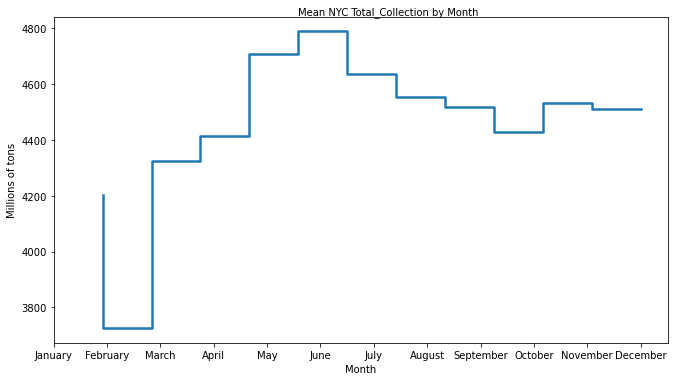

In [25]:
x = df.groupby("Month")['Total_Collection'].median().index
y = df.groupby("Month")['Total_Collection'].mean().values

# plot
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(11)

ax.step(x, y, linewidth=2.5)
plt.style.use('_mpl-gallery')
plt.xticks(np.linspace(0,12,12),months)
plt.xlabel('Month')
plt.ylabel("Millions of tons")
plt.text(5, 4.85*10**3, s = "Mean NYC Total_Collection by Month")

plt.show()
#This makes a step graph of the total NYC Collection by Month

It is a bit peculilar looking but the step chart above shows the different amounts of trash collected each month.  A step chart is perhaps more represntative of the actual reporting of tonnage of waste products collected than a simple line chart because the reporting is done monthy.  This steo chart accurately portrays the "steps" of the datapoints from one month to the next.

In [26]:
y = df.groupby("Month")['Total_Collection'].median()
y.index = months
y

January      4039.40
February     3573.60
March        4123.10
April        4199.95
May          4442.60
June         4553.80
July         4463.30
August       4375.00
September    4292.20
October      4251.25
November     4328.90
December     4302.70
Name: Total_Collection, dtype: float64

In [27]:
set(BoroughGroupBy['Total_Collection'].median().index)

{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}

In [28]:
sorted(list(set(BoroughGroupBy['Total_Collection'].median().index)) )

['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [29]:
df2020 = df[df["Year"]==2020]
df2020.head(2)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,Year,Month,Total_Organics,Total_Collection
2579,2020 / 01,Queens,01,3935.7,662.1,696.1,0.0,0.0,0.0,42.0,2020,1,0.0,5335.9
2580,2020 / 01,Brooklyn,16,2022.3,125.5,188.0,23.7,0.0,9.2,3.8,2020,1,32.9,2372.5


In [30]:
Refuse2020 = np.array(df2020.groupby("Month")["REFUSETONSCOLLECTED"].mean().values)
totalOrganics2020 = np.array(df2020.groupby("Month")["Total_Organics"].mean().values )
paper2020 = np.array(df2020.groupby("Month")["PAPERTONSCOLLECTED"].mean().values )
MGP2020 = np.array(df2020.groupby("Month")["MGPTONSCOLLECTED"].mean().values )


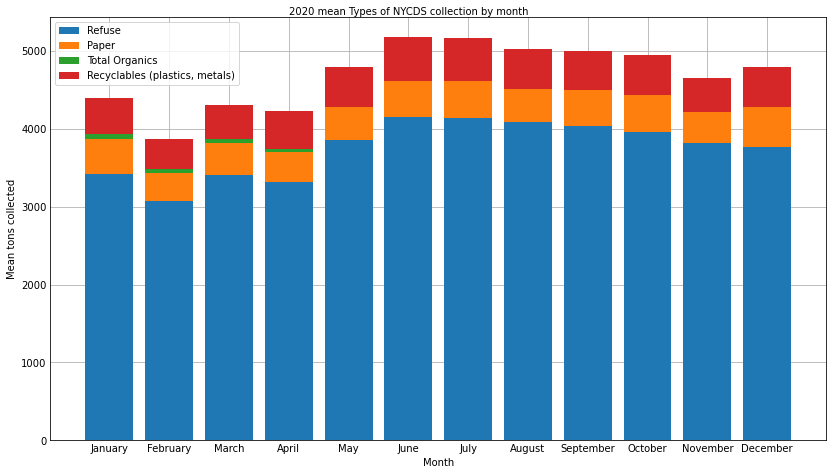

In [31]:
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(11)
plt.bar(np.arange(len(months)), Refuse2020, label = "Refuse")
plt.bar(np.arange(len(months)),  paper2020, bottom = Refuse2020, label = "Paper")
plt.bar(np.arange(len(months)),  totalOrganics2020, bottom = (Refuse2020 + paper2020 ), label = "Total Organics" )
plt.bar(np.arange(len(months)),  MGP2020, bottom = (Refuse2020 + paper2020 + totalOrganics2020 ), label = "Recyclables (plastics, metals)" )

#plt.yscale(np.arange(5100))

plt.xticks(ticks = range(len(months)),labels = months)
plt.legend(loc = "upper left")
plt.text(x= 3, y = 5465, s = "2020 mean Types of NYCDS collection by month")
plt.ylabel("Mean tons collected")
plt.xlabel("Month")
plt.show()

The chart above shows the different amounts of mean tonnage of various types of waste products collected.  A stacked bar chart is useful here because it also emphasizes the total amount Collections even as the proportion of underlying waste streams fluctuates.

# SeaBorn

C:\Users\Noah\anaconda3\envs\dummty2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Mean Total Collection by Borough'),
 Text(0, 0.5, 'Tons collected'),
 Text(0.5, 0, 'Borough')]

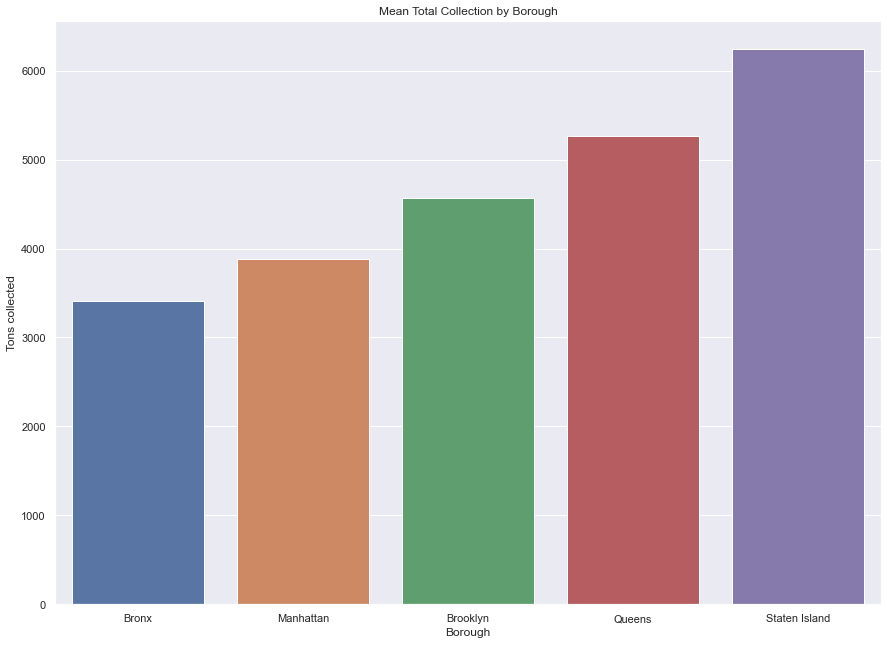

In [43]:
# plt.bar(x,y, color = "brown")
# plt.text(.05,6650,s = "Mean Total NYCDS Collection by Borough")# title was not working on groupby objects, had to make the "title" this janky way
# #Add annotations ✓
# plt.ylabel("Tons collected") #Change the title and x/y labels ✓ 
# plt.show()
x = np.array(BoroughGroupBy.Total_Collection.mean().sort_values(ascending = True).index)
y = np.array(BoroughGroupBy.Total_Collection.mean().sort_values(ascending = True).values)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x, y).set(title = "Mean Total Collection by Borough", ylabel = "Tons collected", xlabel="Borough")




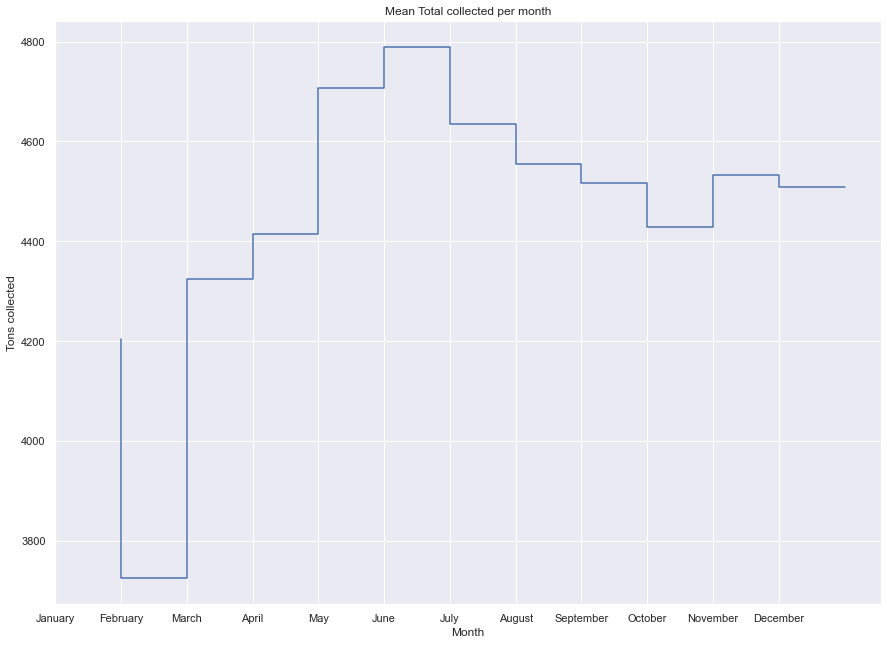

In [55]:
x = df.groupby("Month")['Total_Collection'].median().index
y = df.groupby("Month")['Total_Collection'].mean().values

sns.lineplot(x = x, y= y, drawstyle='steps-pre').set(title = "Mean Total collected per month", 
                                             ylabel = "Tons collected", 
                                             xticks=(range(len(months))), 
                                             xticklabels = months);

In [71]:

Refuse2020 = np.array(df2020.groupby("Month")["REFUSETONSCOLLECTED"].mean().values)

totalOrganics2020 = np.array(df2020.groupby("Month")["Total_Organics"].mean().values ) + Refuse2020

paper2020 = np.array(df2020.groupby("Month")["PAPERTONSCOLLECTED"].mean().values ) + totalOrganics2020

MGP2020 = np.array(df2020.groupby("Month")["MGPTONSCOLLECTED"].mean().values ) + paper2020
Refuse2020


array([3419.86440678, 3073.22033898, 3405.9779661 , 3316.28135593,
       3860.03050847, 4151.02033898, 4139.01186441, 4092.91694915,
       4034.4779661 , 3963.78135593, 3813.85166667, 3763.37333333])

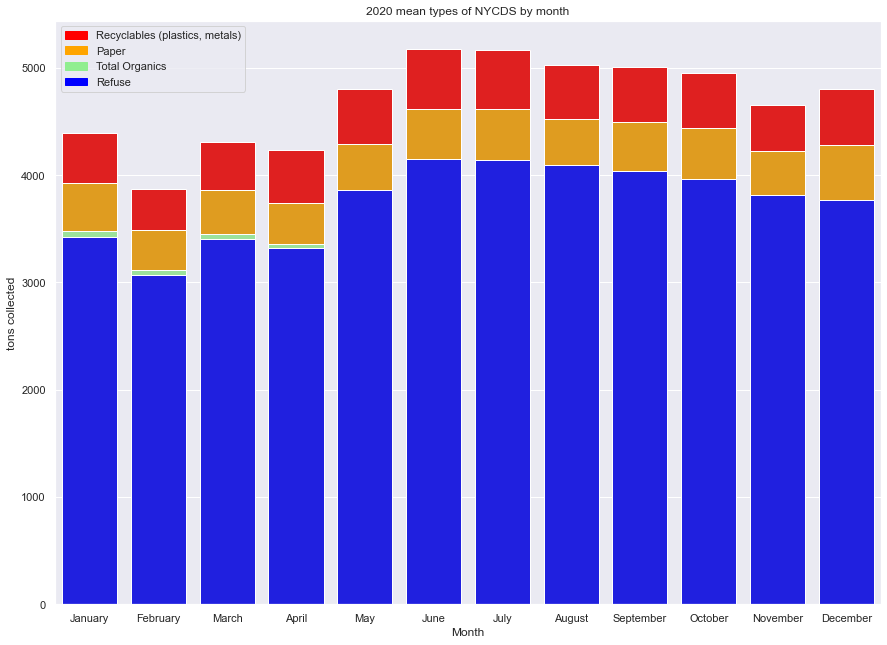

In [94]:
import matplotlib.patches as mpatches

bar4 = sns.barplot(x = np.array(range(12)) , y = MGP2020, color = 'red')
bar3 = sns.barplot(x = np.array(range(12)) , y = paper2020, color = 'orange')
bar2 = sns.barplot(x = np.array(range(12)) , y = totalOrganics2020, color = 'lightgreen')
bar1 = sns.barplot(x = np.array(range(12)) , y = Refuse2020, color = 'blue').set\
(xticklabels = months, title = "2020 mean types of NYCDS by month", 
xlabel = "Month", ylabel = "tons collected")

# add legend
barr1 = mpatches.Patch(color='blue', label='Refuse')
barr2 = mpatches.Patch(color='lightgreen', label='Total Organics')
barr3 = mpatches.Patch(color = 'orange', label = "Paper")
barr4 = mpatches.Patch(color = "red", label = "Recyclables (plastics, metals)")
plt.legend(handles=[barr4, barr3, barr2, barr1]);

#### SNS vs matplotlib

I've always found Seaborn easier to work with.  An obvious difference is that you can pass the dataframe, and x and y can be columns of the dataframe in Seaborn, where as matplotlib.pylot expexts just an x and y argument.  But a less obvious difference is that googling how to do things in Seaborn is typically more straightfoward.  Even with the Stacked Bar Chart above, I couldn't find an obvious example with more than 2 stacked bars on Google.  That said, I was able to retrofit code I found to make it work in a much easier way than I could with matplotlib.pyplot.

## Conclusions

As might be expected, garbage collection remains relatively stable throughout the year.  I cannot believe how much garbage Staten Island outputs compared to their population size.  They put out the most garbage of any borough despite having the lowest population by far.  Maybe it's that their more suburban or perhaps they have an outsized industrial presence.  Outside of those explanations, I can't think of a possible explanation.  There also does seem to be a mass "spring cleaning" phase which is more of a downtick in garbage disposal in February.  Lastly, the craze of the new NYC Organic materials pickup is seemingly a fad and basically a drop in the bucket of NYC's garbage output.